In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

In [2]:
ticker = '603127'

In [3]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
income.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)
incomeq.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)

In [4]:
change = income[['营业总收入', '营业总成本', '净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,净利润
88176,2019-12-31,1.783727e+08,1.11,1.10,56.4,51.2,64.6
88177,2018-12-31,1.083383e+08,0.67,0.67,35.7,36.7,41.7
88179,2017-12-31,7.644640e+07,0.80,0.80,24.6,16.3,47.9
88181,2016-12-31,5.169249e+07,0.84,0.84,17.0,18.0,5.1
88184,2015-12-31,4.917391e+07,0.80,0.80,11.8,15.1,0.4
88186,2014-12-31,4.899620e+07,0.80,0.80,NaN,NaN,NaN


In [5]:
change = incomeq[['营业收入', '净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '净利润']], change], axis=1)
incomeq_change[:24]

,截止日期,营业收入,净利润,营业收入,净利润
144748,2020-06-30,2.426414e+08,5.651781e+07,91.9,99.1
144749,2020-03-31,1.547136e+08,1.914698e+07,107.9,59.0
144750,2019-12-31,2.909242e+08,1.018896e+08,76.3,99.3
144751,2019-09-30,1.475913e+08,3.634686e+07,35.9,4.5
144752,2019-06-30,1.264449e+08,2.838530e+07,51.4,107.7
144753,2019-03-31,7.441903e+07,1.203964e+07,44.1,37.3
144754,2018-12-31,1.650380e+08,5.111578e+07,25.5,22.3
144755,2018-09-30,1.086359e+08,3.478284e+07,45.3,54.8
144756,2018-06-30,8.349150e+07,1.366879e+07,9.7,-28.4
144757,2018-03-31,5.163274e+07,8.770911e+06,172.7,-226.8


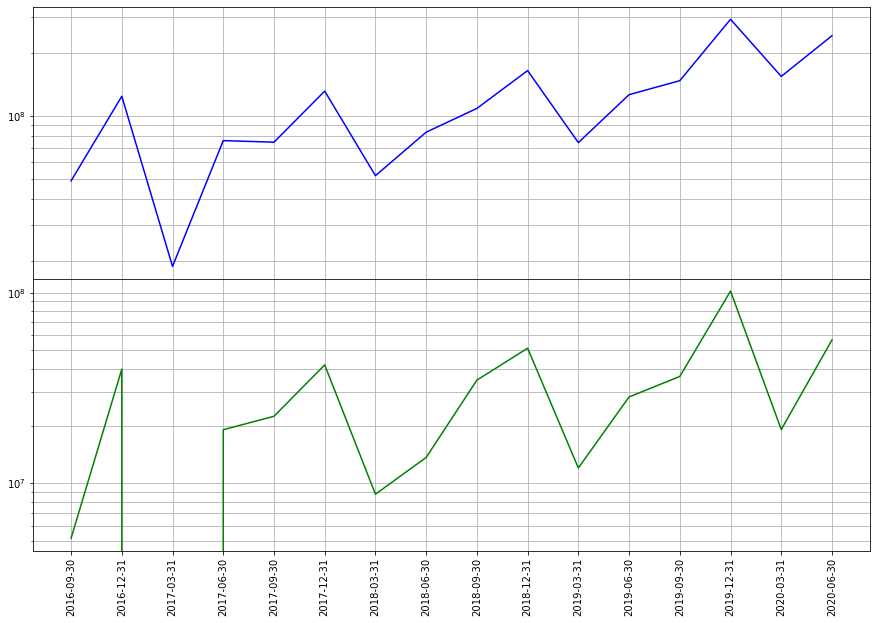

In [6]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [7]:
df = data.get_market(ticker)
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价           累积前复权因子              滚动市盈率  \
            min        max    min     max       min       max      min   
交易日期                                                                     
2017 2017-08-25 2017-12-29  18.01   75.24  0.360562  0.360562  28.4997   
2018 2018-01-02 2018-12-28  38.86   89.19  0.360562  0.506641  45.2967   
2019 2019-01-02 2019-12-31  41.30   79.00  0.506641  0.712418  54.1122   
2020 2020-01-02 2020-10-19  57.50  130.00  0.712418  1.000000  68.6042   

                
           max  
交易日期            
2017  119.0624  
2018   90.1261  
2019   94.3219  
2020  128.4832